# Project idea: A company that sells movies digitally and physically, also cinema tickets 

# Data from Kaggle: https://www.kaggle.com/competitions/tmdb-box-office-prediction/

They have a movie database.

#### Columns are: 
#### -imdb_title_id: ids for imdb.com
#### -title: enlish name of the movie
#### -original_title: name of the movie in its original language
#### -year: publish year of the movie
#### -date: publish date of the movie
#### -genre (multi values / dictionary type)
#### -duration
#### -country (multi values / dictionary type)
#### -language (multi values / dictionary type)
#### -director (multi values / dictionary type)
#### -writer (multi values / dictionary type)
#### -production company 
#### -actors (multi values / dictionary type)
#### -description
#### -avg_vote: avarage vote of the movie from imdb.com
#### -budget
#### -usa_gross_income
#### -worlwide_gross_income
#### -metascore:
#### -reviews_from_users: number of reviews from users of imdb.com
#### -reviews_from_critics: number of reviews from critics of imdb.com

Business questions: (You can search answers as "answer 1" or "answer 2" and so on..)

1- Which words make more sense to highlight the movie in the name of a movie to be marketed?

2- How much does a movie's budget affect its revenue and popularity(number of votes)?

3- Which genres are best to market after the year 2010?

4- Movies with what duration tend to be watched less often?

5- What are the best months in a year and best days in a week to release a movie?

6- Who are the most efficacious actors in a movie's income and popularity(number of votes)?

7- Which ones are the most efficacious directors and writers for movies success (more then mean income)?

8- Which production company has the hightest income and/or popularity(number of votes)?

### importing needed libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from collections import Counter

In [3]:
import sklearn

### Loading the data:

In [4]:
df1 = pd.read_csv("IMDb_movies.csv")

### Seeing the first and last 5 rows:

In [5]:
df1.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [6]:
df1.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN
81272,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,7.2,190,NaN,NaN,$ 2833,NaN,NaN,NaN


### Some statistical and brief information about the data:

In [7]:
df1.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,81273.000000,81273.000000,81273.000000,8.127300e+04,12722.000000,74196.000000,70286.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,55.762695,43.753194,27.992758
std,23.992284,25.320189,1.243315,5.220245e+04,17.757453,159.903568,58.708764
min,1906.000000,40.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,43.000000,4.000000,3.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,56.000000,9.000000,8.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,69.000000,26.000000,24.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          81273 non-null  object 
 1   title                  81273 non-null  object 
 2   original_title         81273 non-null  object 
 3   year                   81273 non-null  int64  
 4   date_published         81273 non-null  object 
 5   genre                  81273 non-null  object 
 6   duration               81273 non-null  int64  
 7   country                81234 non-null  object 
 8   language               80518 non-null  object 
 9   director               81200 non-null  object 
 10  writer                 79780 non-null  object 
 11  production_company     76948 non-null  object 
 12  actors                 81207 non-null  object 
 13  description            78843 non-null  object 
 14  avg_vote               81273 non-null  float64
 15  vo

### Distinguish between "title" and "original_title"

In [9]:
df1[['title', 'original_title']][df1['title'] != df1['original_title']]

,title,original_title
284,Nosferatu,"Nosferatu, eine Symphonie des Grauens"
2556,The Grand Illusion,La grande illusion
2633,Humanity and Paper Balloons,Ninjô kami fûsen
3286,The Story of the Last Chrysanthemums,Zangiku monogatari
5677,Les Parents Terribles,Les parents terribles
...,...,...
76715,Kadvi Hawa,Dark wind
77919,Streaker,Flitzer
78991,Women of Mafia,Kobiety mafii
79557,Tzamaika,Jamaica


### We dont need "imdb_title_id" and "original_title".

In [10]:
df1 = df1.drop(['imdb_title_id', 'original_title'], axis=1)

### if any rows has null values of worlwide_gross_income but non-null values of usa_gross_income

In [11]:
df1.loc[(df1.worlwide_gross_income.isnull()) & (df1.usa_gross_income.notnull())].shape

(940, 20)

###  Adding them as worlwide_gross_income:

In [12]:
df1.worlwide_gross_income = df1.worlwide_gross_income.fillna(
    df1.usa_gross_income.loc[(df1.worlwide_gross_income.isnull()) & (df1.usa_gross_income.notnull())]).dropna()

In [13]:
print('Missing values rate of worlwide_gross_income: %{}'.format(df1.worlwide_gross_income.isnull().sum() / len(df1.worlwide_gross_income) * 100))

Missing values rate of worlwide_gross_income: %62.06366197876293


In [14]:
df1.dropna(subset=["worlwide_gross_income"], inplace=True)

In [15]:
print('Missing values rate of worlwide_gross_income: %{}'.format(df1.worlwide_gross_income.isnull().sum() / len(df1.worlwide_gross_income) * 100))

Missing values rate of worlwide_gross_income: %0.0


In [16]:
df1.worlwide_gross_income.isnull().sum()

0

### We can see the differences in currencies, I will handle them later

In [17]:
df1.worlwide_gross_income.str[:3].unique()

array(['$ 3', '$ 8', '$ 4', '$ 7', '$ 9', '$ 2', '$ 1', '$ 6', 'EUR',
       '$ 5', 'GBP', 'HKD', 'INR', 'NPR', 'PKR'], dtype=object)

### General statistical information for numeric features

In [18]:
df1.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,30832.000000,30832.000000,30832.000000,3.083200e+04,11096.000000,28543.000000,29128.000000
mean,2004.839485,105.148612,6.124309,2.307871e+04,56.094088,89.340364,51.701833
std,14.073265,20.495752,1.090234,8.280984e+04,17.678822,247.352190,83.455964
min,1918.000000,45.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,2001.000000,92.000000,5.500000,4.420000e+02,44.000000,5.000000,6.000000
50%,2008.000000,101.000000,6.300000,1.660500e+03,57.000000,18.000000,19.000000
75%,2014.000000,114.000000,6.900000,9.094000e+03,69.000000,71.000000,58.000000
max,2019.000000,808.000000,9.300000,2.159628e+06,100.000000,8302.000000,987.000000


### Let's see the data types

In [19]:
df1.dtypes

title                     object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

### Let's see the number of missing values for each column

In [20]:
df1.isnull().sum()

title                        0
year                         0
date_published               0
genre                        0
duration                     0
country                     12
language                   155
director                    19
writer                     421
production_company         900
actors                      26
description                837
avg_vote                     0
votes                        0
budget                   18357
usa_gross_income         15738
worlwide_gross_income        0
metascore                19736
reviews_from_users        2289
reviews_from_critics      1704
dtype: int64

### Number of whole raws:

In [21]:
len(df1)

30832

### Now we can calculate the rate of missing values

In [22]:
print('Missing values percentage: %\n{}'.format(df1.isnull().sum() / len(df1) * 100))

Missing values percentage: %
title                     0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.038921
language                  0.502724
director                  0.061624
writer                    1.365464
production_company        2.919045
actors                    0.084328
description               2.714712
avg_vote                  0.000000
votes                     0.000000
budget                   59.538791
usa_gross_income         51.044369
worlwide_gross_income     0.000000
metascore                64.011417
reviews_from_users        7.424105
reviews_from_critics      5.526725
dtype: float64


# Dropping the relevant rows because of the missing values

### Let's drop the columns we won't use:

In [23]:
print('Missing values percentage: %\n{}'.format(df1.isnull().sum() / len(df1) * 100))

Missing values percentage: %
title                     0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.038921
language                  0.502724
director                  0.061624
writer                    1.365464
production_company        2.919045
actors                    0.084328
description               2.714712
avg_vote                  0.000000
votes                     0.000000
budget                   59.538791
usa_gross_income         51.044369
worlwide_gross_income     0.000000
metascore                64.011417
reviews_from_users        7.424105
reviews_from_critics      5.526725
dtype: float64


In [24]:
for i in ["country", "language", "director", "writer", "production_company","reviews_from_critics","reviews_from_users", "actors", "budget"]:
    df1.dropna(subset=[i], inplace=True)

In [25]:
df1 = df1.drop(columns=["description","metascore","usa_gross_income",'reviews_from_users', 'reviews_from_critics'])

In [26]:
print('Missing values percentage: %\n{}'.format(df1.isnull().sum() / len(df1) * 100))

Missing values percentage: %
title                    0.0
year                     0.0
date_published           0.0
genre                    0.0
duration                 0.0
country                  0.0
language                 0.0
director                 0.0
writer                   0.0
production_company       0.0
actors                   0.0
avg_vote                 0.0
votes                    0.0
budget                   0.0
worlwide_gross_income    0.0
dtype: float64


In [27]:
df1.budget

155              $ 18000
232             $ 800000
238             $ 250000
334             $ 351000
397             $ 923000
              ...       
81059          $ 5000000
81163    KRW 11500000000
81234          $ 1200000
81264       MYR 20000000
81267          $ 6000000
Name: budget, Length: 11489, dtype: object

### Now we can see the general statistics without missing values

In [28]:
df1.describe()

,year,duration,avg_vote,votes
count,11489.000000,11489.000000,11489.000000,1.148900e+04
mean,2003.688136,106.719558,6.241205,5.581631e+04
std,12.769026,19.765747,1.077929,1.285615e+05
min,1920.000000,60.000000,1.100000,1.000000e+02
25%,1999.000000,93.000000,5.600000,1.888000e+03
50%,2007.000000,103.000000,6.400000,1.032800e+04
75%,2012.000000,116.000000,7.000000,4.998200e+04
max,2019.000000,422.000000,9.300000,2.159628e+06


# Income and budget has some currency differences

In [29]:
df1[['worlwide_gross_income', 'budget']]

,worlwide_gross_income,budget
155,$ 8811,$ 18000
232,$ 9183673,$ 800000
238,$ 26916,$ 250000
334,$ 11233,$ 351000
397,$ 26916,$ 923000
...,...,...
81059,$ 7257918,$ 5000000
81163,$ 21083522,KRW 11500000000
81234,$ 171229,$ 1200000
81264,$ 83857,MYR 20000000


# Removal of unit signs from incomes and currency transformation

### Writing the function that will detect other existing currencies and convert them to dollars.

In [30]:
def converter(x):
    if '$' in x:
        return int("".join(filter(str.isdigit, x)))
    if 'EUR' in x:
        return 1.17 * int("".join(filter(str.isdigit, x)))
    if 'GBP' in x:
        return 1.29 * int("".join(filter(str.isdigit, x)))
    if 'HKD' in x:
        return 0.13 * int("".join(filter(str.isdigit, x)))
    if 'INR' in x:
        return 0.014 * int("".join(filter(str.isdigit, x)))
    if 'NPR' in x:
        return 0.0085 * int("".join(filter(str.isdigit, x)))
    if 'PKR' in x:
        return 0.0061 * int("".join(filter(str.isdigit, x)))
    else:
        return np.nan

In [31]:
df1["worlwide_gross_income"] = df1["worlwide_gross_income"].iloc[:].apply(lambda x: converter(x))

# Now the data type of worlwide_gross_income is numeric

In [32]:
df1["worlwide_gross_income"].dtype

dtype('int64')

### Budget column is also object before converting:

In [33]:
df1["budget"].dtype

dtype('O')

### Converting the budget feature as well

In [34]:
df1["budget"] = df1["budget"].iloc[:].apply(lambda x: converter(x))

In [35]:
df1["budget"].dtype

dtype('float64')

In [36]:
df1["budget"].isnull().sum()

929

In [37]:
df1.dropna(subset=["budget"], inplace=True)

In [38]:
df1["budget"].isnull().sum()

0

In [39]:
df1.describe()

,year,duration,avg_vote,votes,budget,worlwide_gross_income
count,10560.000000,10560.000000,10560.000000,1.056000e+04,1.056000e+04,1.056000e+04
mean,2003.517424,106.954830,6.232538,5.993887e+04,2.181103e+07,5.645232e+07
std,12.858503,19.903935,1.078775,1.328000e+05,3.362064e+07,1.425963e+08
min,1920.000000,60.000000,1.300000,1.000000e+02,0.000000e+00,1.700000e+01
25%,1998.000000,93.000000,5.600000,2.424000e+03,3.000000e+06,5.928375e+05
50%,2007.000000,103.000000,6.300000,1.262250e+04,1.000000e+07,7.686503e+06
75%,2012.000000,116.000000,7.000000,5.673775e+04,2.500000e+07,4.479521e+07
max,2019.000000,422.000000,9.300000,2.159628e+06,3.560000e+08,2.797801e+09


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10560 entries, 155 to 81267
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  10560 non-null  object 
 1   year                   10560 non-null  int64  
 2   date_published         10560 non-null  object 
 3   genre                  10560 non-null  object 
 4   duration               10560 non-null  int64  
 5   country                10560 non-null  object 
 6   language               10560 non-null  object 
 7   director               10560 non-null  object 
 8   writer                 10560 non-null  object 
 9   production_company     10560 non-null  object 
 10  actors                 10560 non-null  object 
 11  avg_vote               10560 non-null  float64
 12  votes                  10560 non-null  int64  
 13  budget                 10560 non-null  float64
 14  worlwide_gross_income  10560 non-null  int64  
dtype

# Looking for every column

# Column: 'title'

### In order to analyse titles I use splitting and then see the frequency of the words in titles

In [41]:
df1.title = df1.title.str.split(' ', expand=False)

In [42]:
title_words = list(df1['title'].apply(lambda x: [i for i in x] if x != '' else []).values)

### Visulazing the counted words with WordCloud

In [43]:
from wordcloud import WordCloud

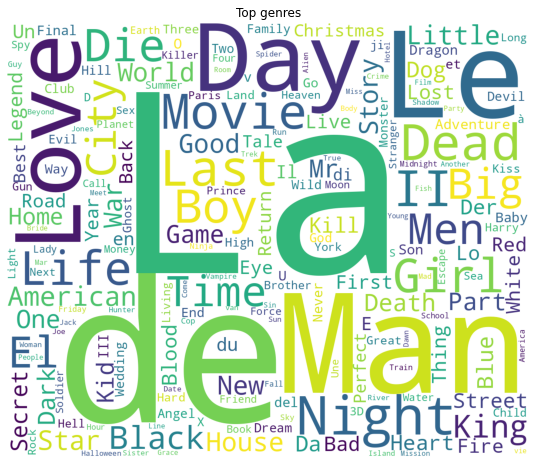

In [44]:
plt.figure(figsize=(12, 8))
text = ' '.join([i for j in title_words for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

# Year

### Frequencies of the years in the data:

In [45]:
df1.groupby('year')['year'].count().sort_values(ascending=False).head(20)

year
2007    497
2008    486
2009    480
2011    463
2013    457
2016    457
2006    456
2010    440
2012    422
2014    411
2015    402
2005    387
2017    381
2004    348
2018    326
2002    318
2003    273
2001    267
2000    225
1999    211
Name: year, dtype: int64

### Distrubiton graph for each year

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


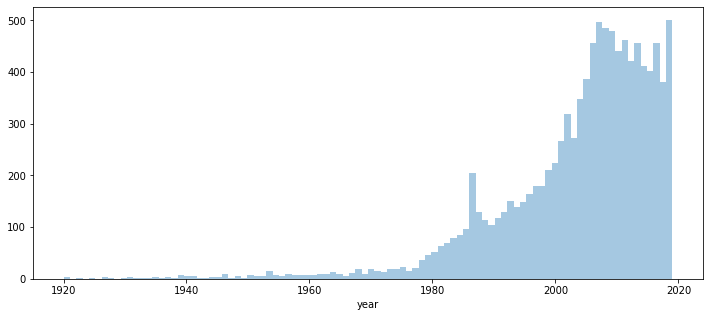

In [46]:
plt.figure(figsize=(12, 5))
ax = sns.distplot((df1['year']), bins=len(df1['year'].unique()), kde=False)

### Years with the highest income:

In [47]:
g1 = df1.groupby('year')['worlwide_gross_income'].sum().sort_values(ascending=False)

In [48]:
g1.reset_index()

,year,worlwide_gross_income
0,2016,31044769342
1,2017,30897865876
2,2018,29497481686
3,2014,28468213959
4,2015,28340360207
...,...,...
91,1934,8717
92,1949,5534
93,1932,4072
94,1933,2251


### Visualization of years with the highest income :

In [49]:
# there may be need to install lets_plot
#pip install lets_plot

In [50]:
from lets_plot import *
LetsPlot.setup_html()
ggplot(g1.reset_index()) + geom_bar(aes(x="year", y="worlwide_gross_income"), stat='identity')

# 'date_published'

### Converting 'date_published' column's data type to datetime

In [51]:
df1.date_published = pd.to_datetime(df1['date_published'])

### Let's get the 'month' and 'day_of_week' values from the dates

In [52]:
df1['month'] = df1.date_published.apply(lambda x: x.strftime("%B"))

In [53]:
df1['day_of_week'] = df1.date_published.apply(lambda x: x.strftime("%A"))

## Answer 5

In [54]:
from lets_plot import *
ggplot(df1) + geom_bar(aes(x="month", y="worlwide_gross_income"), stat='identity')

### As we see  months with the highest revenue for release are July and December

In [55]:
from lets_plot import *
ggplot(df1[['day_of_week', 'worlwide_gross_income']]) + geom_bar(aes(x="day_of_week", y="worlwide_gross_income"), stat='identity')

### As we see, the day which has the highest avarage revenue for release is Friday

### -----

### Before Genre

### Converting comma-separated columns with multiple values into operable lists

In [56]:
lf = ['genre', 'country', 'language', 'director', 'writer', 'production_company', 'actors']

In [57]:
def listmaker(df, fets):
    for i in fets:
        df[i] = df[i].str.split(', ', expand=False)

In [58]:
listmaker(df1, lf)

# Genre

In [59]:
print('Number of genres in films:')
df1['genre'].apply(lambda x: len(x) if x != [] else 0).value_counts()

Number of genres in films:


3    5978
2    3028
1    1554
Name: genre, dtype: int64

### There are maximum and mostly 3 genres together for a movie

### Let's see the most common genres

In [60]:
list_of_genres = list(df1['genre'].apply(lambda x: [i for i in x] if x != '' else []).values)

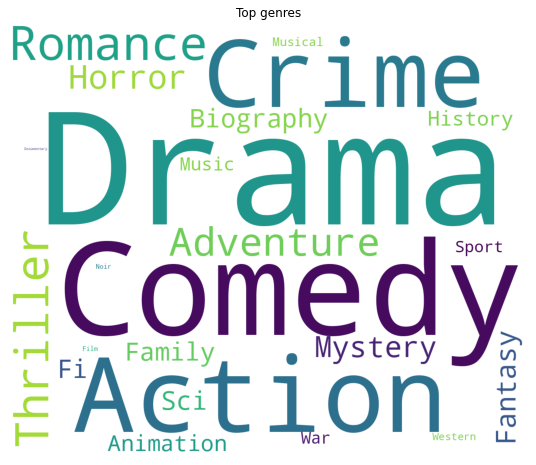

In [61]:
plt.figure(figsize=(12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

### Here are the most common 10 Genres:

In [62]:
Counter([i for j in list_of_genres for i in j]).most_common(10)

[('Drama', 5888),
 ('Comedy', 3880),
 ('Action', 2335),
 ('Crime', 1885),
 ('Romance', 1810),
 ('Thriller', 1711),
 ('Adventure', 1606),
 ('Horror', 1107),
 ('Mystery', 847),
 ('Fantasy', 747)]

In [63]:
#df1['genre_num'] = df1['genre'].apply(lambda x: len(x) if x != [] else 0)

### Creating dummy variables for the regarding categorical feature

In [64]:
df1['all_genres'] = df1['genre'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != [] else '')

In [65]:
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    df1['genre_' + g] = df1['all_genres'].apply(lambda x: 1 if g in x else 0)

In [66]:
#df1 = df1.drop(['genre'], axis=1)

In [67]:
df1.columns

Index(['title', 'year', 'date_published', 'genre', 'duration', 'country',
       'language', 'director', 'writer', 'production_company', 'actors',
       'avg_vote', 'votes', 'budget', 'worlwide_gross_income', 'month',
       'day_of_week', 'all_genres', 'genre_Drama', 'genre_Comedy',
       'genre_Action', 'genre_Crime', 'genre_Romance', 'genre_Thriller',
       'genre_Adventure', 'genre_Horror', 'genre_Mystery', 'genre_Fantasy',
       'genre_Biography', 'genre_Sci-Fi', 'genre_Family', 'genre_Animation',
       'genre_History'],
      dtype='object')

# Column: 'duration'

In [68]:
df1["duration"].describe()

count    10560.000000
mean       106.954830
std         19.903935
min         60.000000
25%         93.000000
50%        103.000000
75%        116.000000
max        422.000000
Name: duration, dtype: float64

In [69]:
from lets_plot import *
LetsPlot.setup_html()
ggplot(df1["duration"].reset_index()) + geom_area(aes(x="duration", y="..density.."), stat='density')

## Answer 4

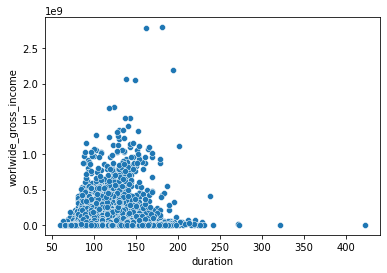

In [70]:
sns.scatterplot(x="duration", y="worlwide_gross_income", data=df1);

### Generally between 90 minutes and 120, the movies has highest income

# Column: 'avg_vote'

In [71]:
df1["avg_vote"].describe()

count    10560.000000
mean         6.232538
std          1.078775
min          1.300000
25%          5.600000
50%          6.300000
75%          7.000000
max          9.300000
Name: avg_vote, dtype: float64

In [72]:
from lets_plot import *
LetsPlot.setup_html()
ggplot(df1["avg_vote"].reset_index()) + geom_area(aes(x="avg_vote", y="..density.."), stat='density')

# Column: 'country'

In [73]:
list_of_countries = list(df1['country'].apply(lambda x: [i for i in x] if x != '' else []).values)

In [74]:
(Counter([i for j in list_of_countries for i in j])).most_common(10)

[('USA', 7052),
 ('UK', 1557),
 ('France', 1222),
 ('Germany', 904),
 ('Canada', 619),
 ('Spain', 416),
 ('India', 407),
 ('Italy', 366),
 ('China', 260),
 ('Japan', 251)]

In [75]:
df1['country_list'] = df1['country'].apply(lambda x: ' '.join(sorted([i for i in x])) if x != [] else '')

In [76]:
top_c = [k[0] for k in Counter([i for j in list_of_countries for i in j]).most_common(10)]
for s in top_c:
    df1['country_' + s] = df1['country_list'].apply(lambda x: 1 if s in x else 0)

In [77]:
df1.columns

Index(['title', 'year', 'date_published', 'genre', 'duration', 'country',
       'language', 'director', 'writer', 'production_company', 'actors',
       'avg_vote', 'votes', 'budget', 'worlwide_gross_income', 'month',
       'day_of_week', 'all_genres', 'genre_Drama', 'genre_Comedy',
       'genre_Action', 'genre_Crime', 'genre_Romance', 'genre_Thriller',
       'genre_Adventure', 'genre_Horror', 'genre_Mystery', 'genre_Fantasy',
       'genre_Biography', 'genre_Sci-Fi', 'genre_Family', 'genre_Animation',
       'genre_History', 'country_list', 'country_USA', 'country_UK',
       'country_France', 'country_Germany', 'country_Canada', 'country_Spain',
       'country_India', 'country_Italy', 'country_China', 'country_Japan'],
      dtype='object')

### To make it easier to create dummy variables, I turned the process into a function

In [78]:
def expander(a,b):
    list_of_ = list(df1[a].apply(lambda x: [i for i in x] if x != '' else []).values)
    df1[a + '_list'] = df1[a].apply(lambda x: ' '.join(sorted([i for i in x])) if x != [] else '')
    top_ = [k[0] for k in Counter([i for j in list_of_ for i in j]).most_common(b)]
    for s in top_:
        df1[(a + '_' + s)] = df1[(a +'_list')].apply(lambda x: 1 if s in x else 0)

### Applying the function to rest of the categorical features

In [79]:
#df1['month'] = df1['month'].astype(str)
#df1['day_of_week'] = df1['day_of_week'].astype(str)

In [80]:
for i in ['language','director','writer','production_company']:
    expander(i,12)

### Using get dummies function for month and day of week

In [81]:
df1=pd.get_dummies(df1, columns=['month'])

In [82]:
df1=pd.get_dummies(df1, columns=['day_of_week'])

In [83]:
df1.columns.values

array(['title', 'year', 'date_published', 'genre', 'duration', 'country',
       'language', 'director', 'writer', 'production_company', 'actors',
       'avg_vote', 'votes', 'budget', 'worlwide_gross_income',
       'all_genres', 'genre_Drama', 'genre_Comedy', 'genre_Action',
       'genre_Crime', 'genre_Romance', 'genre_Thriller',
       'genre_Adventure', 'genre_Horror', 'genre_Mystery',
       'genre_Fantasy', 'genre_Biography', 'genre_Sci-Fi', 'genre_Family',
       'genre_Animation', 'genre_History', 'country_list', 'country_USA',
       'country_UK', 'country_France', 'country_Germany',
       'country_Canada', 'country_Spain', 'country_India',
       'country_Italy', 'country_China', 'country_Japan', 'language_list',
       'language_English', 'language_French', 'language_Spanish',
       'language_German', 'language_Italian', 'language_Russian',
       'language_Japanese', 'language_Mandarin', 'language_Hindi',
       'language_Arabic', 'language_Cantonese', 'language_Korean',

### Actors

In [84]:
# For actors I wanted to handle it seperate

In [85]:
# Selecting the first 6 player 

In [86]:
df1['actors'] = df1['actors'].apply(lambda x: x[0:6] if x != '' else '')

In [87]:
# Creating the dummies

In [88]:
list_of_cast_names = list(df1['actors'].apply(lambda x: [i for i in x] if x != '' else []).values)

In [89]:
dflcn = Counter([i for j in list_of_cast_names for i in j])

In [90]:
dflcn.most_common(20)

[('Robert De Niro', 72),
 ('Bruce Willis', 65),
 ('Nicolas Cage', 62),
 ('Samuel L. Jackson', 62),
 ('Morgan Freeman', 46),
 ('Woody Harrelson', 45),
 ('Nicole Kidman', 44),
 ('Clint Eastwood', 43),
 ('Gene Hackman', 43),
 ('Sylvester Stallone', 43),
 ('Liam Neeson', 43),
 ('Tom Hanks', 42),
 ('Alec Baldwin', 42),
 ('John Cusack', 41),
 ('Robert Downey Jr.', 41),
 ('Forest Whitaker', 41),
 ('Harvey Keitel', 40),
 ('Jeff Bridges', 40),
 ('Dennis Quaid', 40),
 ('Johnny Depp', 40)]

In [91]:
dflcn = pd.DataFrame.from_dict(dflcn, orient='index').reset_index()

In [92]:
dflcn.columns = ['cast_name', 'count']

In [93]:
#df1['num_actors'] = df1['actors'].apply(lambda x: len(x) if x != '' else 0)

In [94]:
df1.columns

Index(['title', 'year', 'date_published', 'genre', 'duration', 'country',
       'language', 'director', 'writer', 'production_company',
       ...
       'month_November', 'month_October', 'month_September',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object', length=113)

In [95]:
mostc_actors = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(20)]

In [96]:
for g in mostc_actors:
    df1[g] = df1['actors'].apply(lambda x: 1 if g in str(x) else 0)

In [97]:
for i, e in enumerate(df1.columns):
    print(i, e)

0 title
1 year
2 date_published
3 genre
4 duration
5 country
6 language
7 director
8 writer
9 production_company
10 actors
11 avg_vote
12 votes
13 budget
14 worlwide_gross_income
15 all_genres
16 genre_Drama
17 genre_Comedy
18 genre_Action
19 genre_Crime
20 genre_Romance
21 genre_Thriller
22 genre_Adventure
23 genre_Horror
24 genre_Mystery
25 genre_Fantasy
26 genre_Biography
27 genre_Sci-Fi
28 genre_Family
29 genre_Animation
30 genre_History
31 country_list
32 country_USA
33 country_UK
34 country_France
35 country_Germany
36 country_Canada
37 country_Spain
38 country_India
39 country_Italy
40 country_China
41 country_Japan
42 language_list
43 language_English
44 language_French
45 language_Spanish
46 language_German
47 language_Italian
48 language_Russian
49 language_Japanese
50 language_Mandarin
51 language_Hindi
52 language_Arabic
53 language_Cantonese
54 language_Korean
55 director_list
56 director_Woody Allen
57 director_Clint Eastwood
58 director_Steven Spielberg
59 director_Steve

# Columns: 'votes'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='votes', ylabel='Density'>

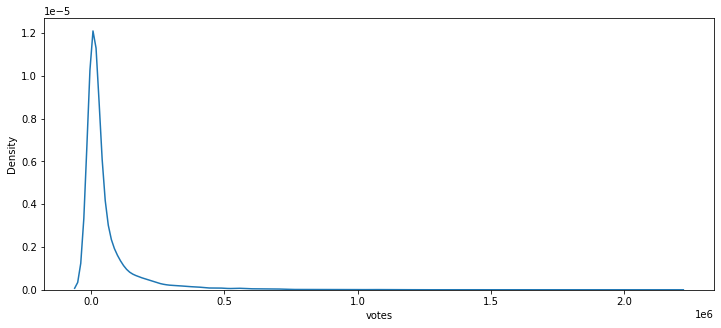

In [98]:
plt.figure(figsize=(12, 5))
sns.distplot(df1["votes"], kde=True, rug=False, hist=False)

In [99]:
# Because of the distribution is skewed, I use log1 of it

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


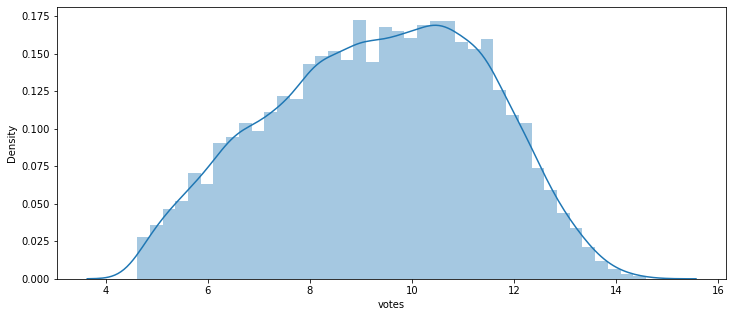

In [100]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(np.log1p(df1['votes']), bins=40, kde=True)

In [101]:
df1['log1p_votes'] = (np.log1p(df1['votes']))

# Columns: 'budget'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget', ylabel='Density'>

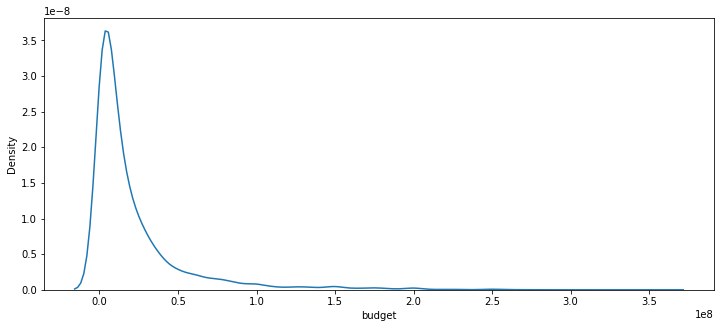

In [102]:
plt.figure(figsize=(12, 5))
sns.distplot(df1["budget"], kde=True, rug=False, hist=False)

In [103]:
# Because of the distribution is skewed, I use log1 of it

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


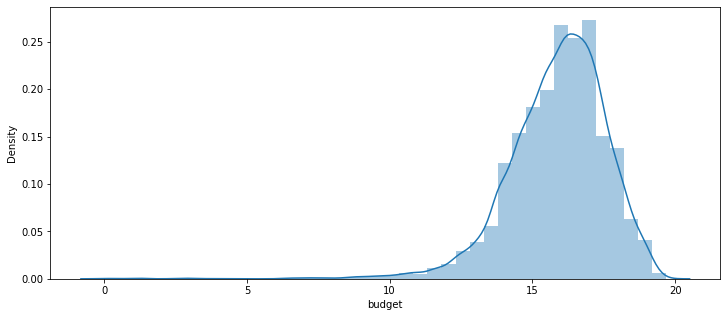

In [104]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(np.log1p(df1['budget']), bins=40, kde=True)

In [105]:
df1['log1p_budget'] = (np.log1p(df1['budget']))

# Examining the distribution of Income values

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='worlwide_gross_income', ylabel='Density'>

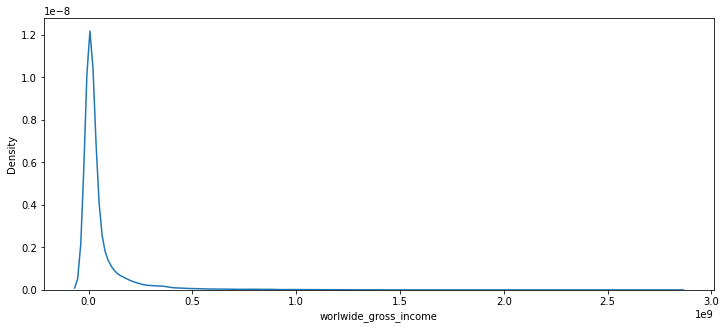

In [106]:
plt.figure(figsize=(12, 5))
sns.distplot(df1["worlwide_gross_income"], kde=True, rug=False, hist=False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


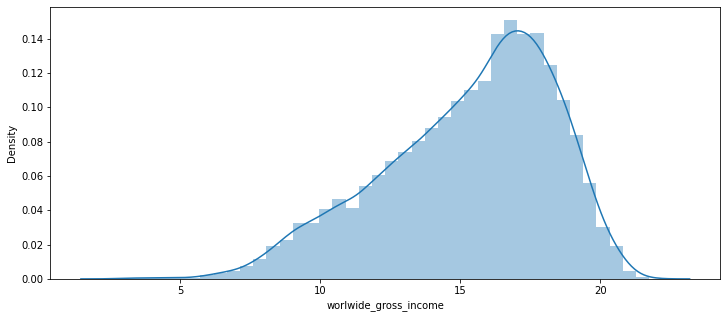

In [107]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(np.log1p(df1['worlwide_gross_income']), bins=40, kde=True)

In [108]:
#pip install lets-plot

In [109]:
from lets_plot import *
LetsPlot.setup_html()
ggplot(np.log1p(df1['worlwide_gross_income']).reset_index()) + geom_area(aes(x="worlwide_gross_income", y="..density.."), stat='density')

In [110]:
# Because of the distribution is skewed, I use log1 of it

In [111]:
df1['log1p_worlwide_gross_income']=(np.log1p(df1['worlwide_gross_income']))

# Answer 2

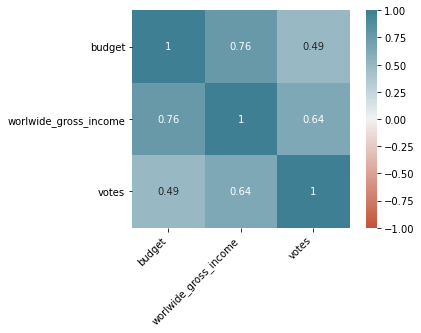

In [112]:
corr = df1[["budget", "worlwide_gross_income", "votes"]].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Number of votes and budget has almost %50 percent correlation and worldwide income and budget has %76 percent correlation
-----

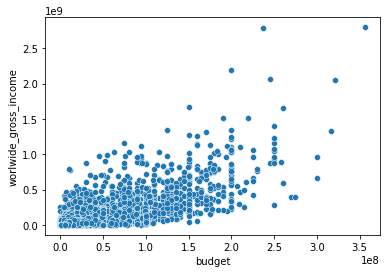

In [113]:
sns.scatterplot(x="budget", y="worlwide_gross_income", data=df1);

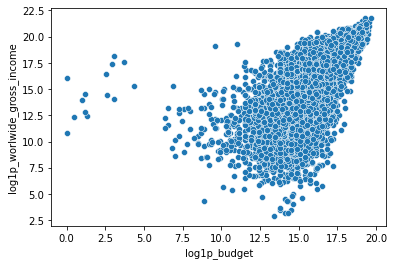

In [114]:
sns.scatterplot(x="log1p_budget", y="log1p_worlwide_gross_income", data=df1);

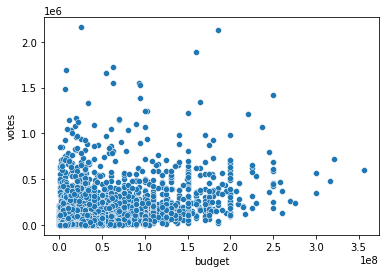

In [115]:
sns.scatterplot(x="budget", y="votes", data=df1);

In [116]:
lwgi_actrs = df1[['Robert De Niro',
       'Bruce Willis', 'Nicolas Cage', 'Samuel L. Jackson',
       'Morgan Freeman', 'Woody Harrelson', 'Nicole Kidman',
       'Clint Eastwood', 'Gene Hackman', 'Sylvester Stallone',
       'Liam Neeson', 'Tom Hanks', 'Alec Baldwin', 'John Cusack',
       'Robert Downey Jr.', 'Forest Whitaker', 'Harvey Keitel',
       'Jeff Bridges', 'Dennis Quaid', 'Johnny Depp', 'log1p_worlwide_gross_income']]

In [117]:
vscores = lwgi_actrs.corr()['log1p_worlwide_gross_income'].to_frame()

In [118]:
vscores = vscores.sort_values(by='log1p_worlwide_gross_income', ascending=False)

## Answer 6 : Next 4 cells shows that most efficacious actors are: Tom Hanks, Johnny Depp, Robert De Niro, Robert Downey Jr., Samuel L. Jackson, Morgan Freeman, Bruce Wills

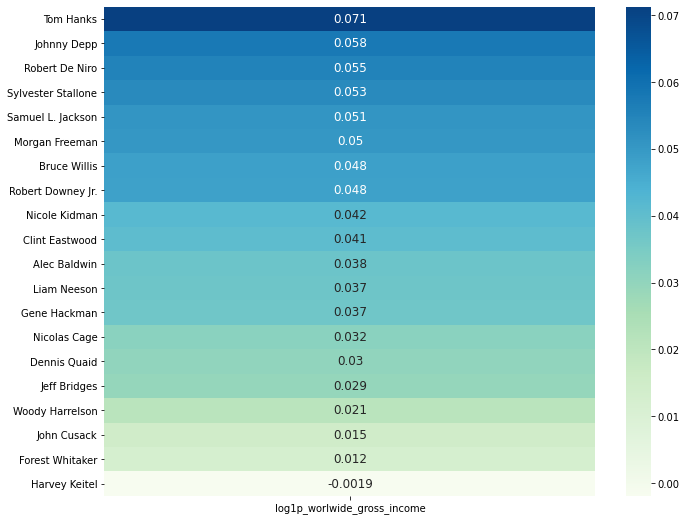

In [119]:
#set fig size
fig, ax = plt.subplots(figsize=(11, 9))
#plot matrix
sns.heatmap(vscores.iloc[1:, :], annot=True, annot_kws={'size': 12}, cmap="GnBu")
plt.show()

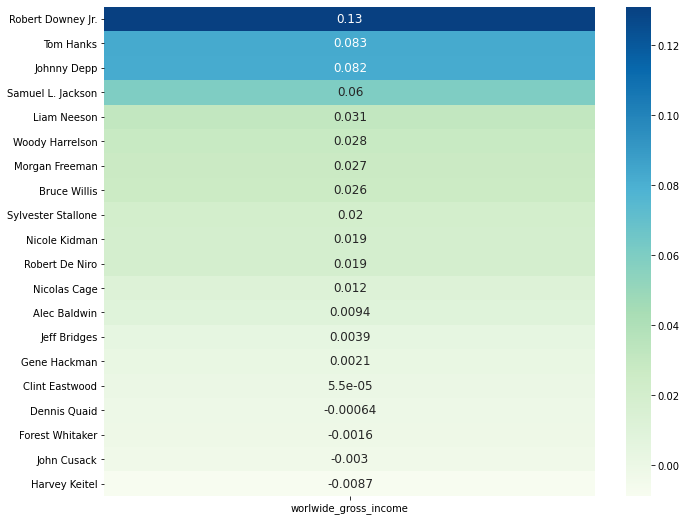

In [120]:
lwgi_actrs = df1[['Robert De Niro',
       'Bruce Willis', 'Nicolas Cage', 'Samuel L. Jackson',
       'Morgan Freeman', 'Woody Harrelson', 'Nicole Kidman',
       'Clint Eastwood', 'Gene Hackman', 'Sylvester Stallone',
       'Liam Neeson', 'Tom Hanks', 'Alec Baldwin', 'John Cusack',
       'Robert Downey Jr.', 'Forest Whitaker', 'Harvey Keitel',
       'Jeff Bridges', 'Dennis Quaid', 'Johnny Depp', 'worlwide_gross_income']]

vscores = lwgi_actrs.corr()['worlwide_gross_income'].to_frame()
vscores = vscores.sort_values(by='worlwide_gross_income', ascending=False)

#set fig size
fig, ax = plt.subplots(figsize=(11, 9))
#plot matrix
sns.heatmap(vscores.iloc[1:, :], annot=True, annot_kws={'size': 12}, cmap="GnBu")
plt.show()

In [121]:
# votes değerleri ile korelasyon

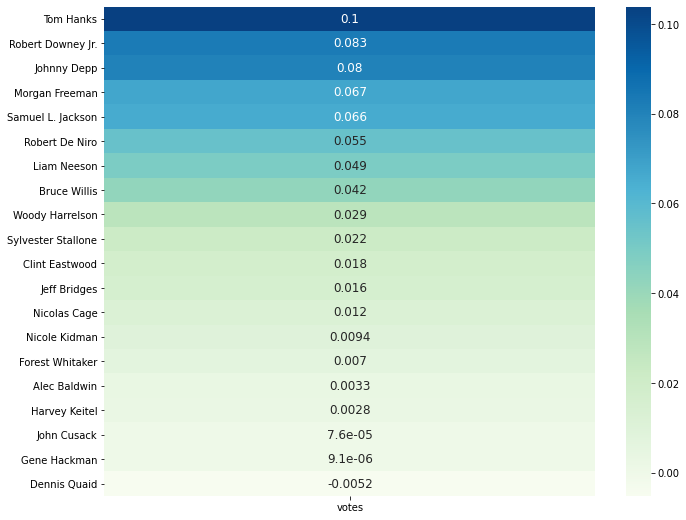

In [122]:
lwgi_actrs = df1[['Robert De Niro',
       'Bruce Willis', 'Nicolas Cage', 'Samuel L. Jackson',
       'Morgan Freeman', 'Woody Harrelson', 'Nicole Kidman',
       'Clint Eastwood', 'Gene Hackman', 'Sylvester Stallone',
       'Liam Neeson', 'Tom Hanks', 'Alec Baldwin', 'John Cusack',
       'Robert Downey Jr.', 'Forest Whitaker', 'Harvey Keitel',
       'Jeff Bridges', 'Dennis Quaid', 'Johnny Depp', 'votes']]

vscores = lwgi_actrs.corr()['votes'].to_frame()
vscores = vscores.sort_values(by='votes', ascending=False)

#set fig size
fig, ax = plt.subplots(figsize=(11, 9))
#plot matrix
sns.heatmap(vscores.iloc[1:, :], annot=True, annot_kws={'size': 12}, cmap="GnBu")
plt.show()

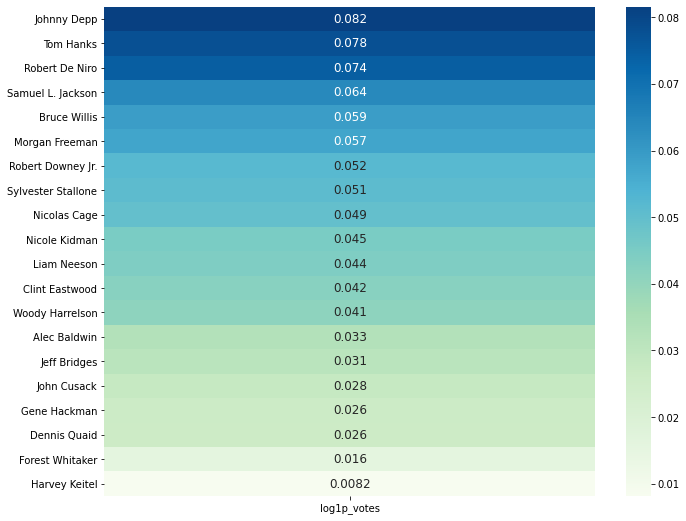

In [123]:
lwgi_actrs = df1[['Robert De Niro',
       'Bruce Willis', 'Nicolas Cage', 'Samuel L. Jackson',
       'Morgan Freeman', 'Woody Harrelson', 'Nicole Kidman',
       'Clint Eastwood', 'Gene Hackman', 'Sylvester Stallone',
       'Liam Neeson', 'Tom Hanks', 'Alec Baldwin', 'John Cusack',
       'Robert Downey Jr.', 'Forest Whitaker', 'Harvey Keitel',
       'Jeff Bridges', 'Dennis Quaid', 'Johnny Depp', 'log1p_votes']]

vscores = lwgi_actrs.corr()['log1p_votes'].to_frame()
vscores = vscores.sort_values(by='log1p_votes', ascending=False)

#set fig size
fig, ax = plt.subplots(figsize=(11, 9))
#plot matrix
sns.heatmap(vscores.iloc[1:, :], annot=True, annot_kws={'size': 12}, cmap="GnBu")
plt.show()

In [124]:
corr = df1[["budget", "duration", "worlwide_gross_income", "votes","avg_vote"]].corr()

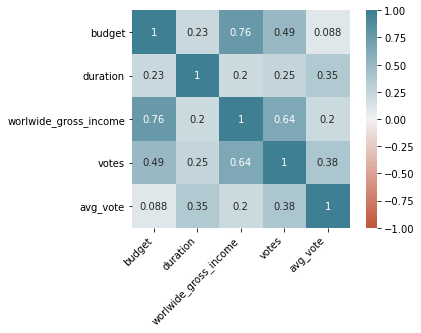

In [125]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [126]:
corr = df1[["log1p_budget", "log1p_worlwide_gross_income", "log1p_votes"]].corr()

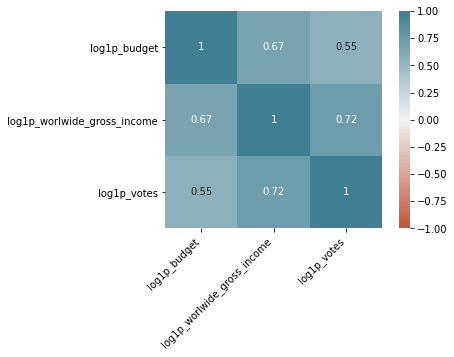

In [127]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Creating the column that keeps income values greater than average as successful (1)

In [128]:
#np.percentile(df1["worlwide_gross_income"],88)-df1["worlwide_gross_income"].mean()

In [129]:
df1["income_success"] = df1["log1p_worlwide_gross_income"].apply(lambda x: 0 if x < (
    df1["log1p_worlwide_gross_income"].mean()) else 1)

In [130]:
df1["income_success"].where(df1["income_success"] == 0).count()

4594

In [131]:
df1["income_success"].where(df1["income_success"] > 0).count()

5966

In [132]:
df1.columns.values

array(['title', 'year', 'date_published', 'genre', 'duration', 'country',
       'language', 'director', 'writer', 'production_company', 'actors',
       'avg_vote', 'votes', 'budget', 'worlwide_gross_income',
       'all_genres', 'genre_Drama', 'genre_Comedy', 'genre_Action',
       'genre_Crime', 'genre_Romance', 'genre_Thriller',
       'genre_Adventure', 'genre_Horror', 'genre_Mystery',
       'genre_Fantasy', 'genre_Biography', 'genre_Sci-Fi', 'genre_Family',
       'genre_Animation', 'genre_History', 'country_list', 'country_USA',
       'country_UK', 'country_France', 'country_Germany',
       'country_Canada', 'country_Spain', 'country_India',
       'country_Italy', 'country_China', 'country_Japan', 'language_list',
       'language_English', 'language_French', 'language_Spanish',
       'language_German', 'language_Italian', 'language_Russian',
       'language_Japanese', 'language_Mandarin', 'language_Hindi',
       'language_Arabic', 'language_Cantonese', 'language_Korean',

In [133]:
X = df1[['year', 'duration','avg_vote', 'votes', 'budget',
       'genre_Drama', 'genre_Comedy', 'genre_Action', 'genre_Crime',
       'genre_Romance', 'genre_Thriller', 'genre_Adventure',
       'genre_Horror', 'genre_Mystery', 'genre_Fantasy',
       'genre_Biography', 'genre_Sci-Fi', 'genre_Family',
       'genre_Animation', 'genre_History', 'country_USA',
       'country_UK', 'country_France', 'country_Germany',
       'country_Canada', 'country_Spain', 'country_India',
       'country_Italy', 'country_China', 'country_Japan', 
       'language_English', 'language_French', 'language_Spanish',
       'language_German', 'language_Italian', 'language_Russian',
       'language_Japanese', 'language_Mandarin', 'language_Hindi',
       'language_Arabic', 'language_Cantonese', 'language_Korean',
       'director_Woody Allen', 'director_Clint Eastwood',
       'director_Steven Spielberg', 'director_Steven Soderbergh',
       'director_Martin Scorsese', 'director_Ridley Scott',
       'director_Ron Howard', 'director_Brian De Palma',
       'director_Barry Levinson', 'director_Francis Ford Coppola',
       'director_Robert Zemeckis', 'director_Tim Burton', 
       'writer_Woody Allen', 'writer_Stephen King', 'writer_Luc Besson',
       'writer_John Hughes', 'writer_William Shakespeare',
       'writer_David Koepp', 'writer_Tyler Perry', 'writer_Ethan Coen',
       'writer_William Goldman', 'writer_John Sayles', 'writer_Joel Coen',
       'writer_Sylvester Stallone', 
       'production_company_Universal Pictures',
       'production_company_Warner Bros.',
       'production_company_Columbia Pictures',
       'production_company_Paramount Pictures',
       'production_company_Twentieth Century Fox',
       'production_company_New Line Cinema',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
       'production_company_Touchstone Pictures',
       'production_company_Walt Disney Pictures',
       'production_company_DreamWorks', 'production_company_Miramax',
       'production_company_TriStar Pictures', 'month_April',
       'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March',
       'month_May', 'month_November', 'month_October', 'month_September',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'Robert De Niro',
       'Bruce Willis', 'Nicolas Cage', 'Samuel L. Jackson',
       'Morgan Freeman', 'Woody Harrelson', 'Nicole Kidman',
       'Clint Eastwood', 'Gene Hackman', 'Sylvester Stallone',
       'Liam Neeson', 'Tom Hanks', 'Alec Baldwin', 'John Cusack',
       'Robert Downey Jr.', 'Forest Whitaker', 'Harvey Keitel',
       'Jeff Bridges', 'Dennis Quaid', 'Johnny Depp', 'log1p_votes',
       'log1p_budget']]

In [134]:
y = df1['income_success']

1- Which words make more sense to highlight the movie in the name of a movie to be marketed?

## Answer 1

In [135]:
#df1.title = df1.title.str.split(' ', expand=False)

In [136]:
title_words2 = list(df1['title'][df1['income_success']>0].apply(lambda x: [i for i in x] if x != '' else []).values)

In [137]:
Counter([i for j in title_words2 for i in j]).most_common(30)

[('The', 1168),
 ('the', 465),
 ('of', 445),
 ('and', 137),
 ('in', 127),
 ('2', 109),
 ('A', 106),
 ('to', 100),
 ('Man', 85),
 ('a', 78),
 ('&', 72),
 ('Movie', 52),
 ('I', 46),
 ('de', 45),
 ('II', 44),
 ('on', 43),
 ('Love', 43),
 ('Last', 43),
 ('with', 42),
 ('My', 42),
 ('You', 41),
 ('La', 41),
 ('for', 40),
 ('Me', 40),
 ('Night', 39),
 ('Day', 38),
 ('Dead', 38),
 ('House', 37),
 ('3', 37),
 ('Big', 35)]

In [138]:
df1['genre'][df1['income_success']>0][df1['year']>2010]


41298    [Adventure, Drama, Romance]
42089       [Comedy, Drama, Fantasy]
42347         [Action, Crime, Drama]
42553    [Action, Adventure, Sci-Fi]
42839                [Comedy, Drama]
                    ...             
80697                  [Action, War]
80858             [Biography, Drama]
80946               [Comedy, Family]
81022                       [Comedy]
81059                       [Comedy]
Name: genre, Length: 1753, dtype: object

## Answer 3

In [139]:
list_of_genres3 = list((df1['genre'][df1['income_success']>0][df1['year']>2010].apply(lambda x: [i for i in x] if x != '' else []).values))

In [140]:
Counter([i for j in list_of_genres3 for i in j]).most_common(5)

[('Drama', 875),
 ('Comedy', 667),
 ('Action', 550),
 ('Adventure', 449),
 ('Thriller', 288)]

## Answer 7 : Most efficacious directors and writers for movies success (more then mean income)

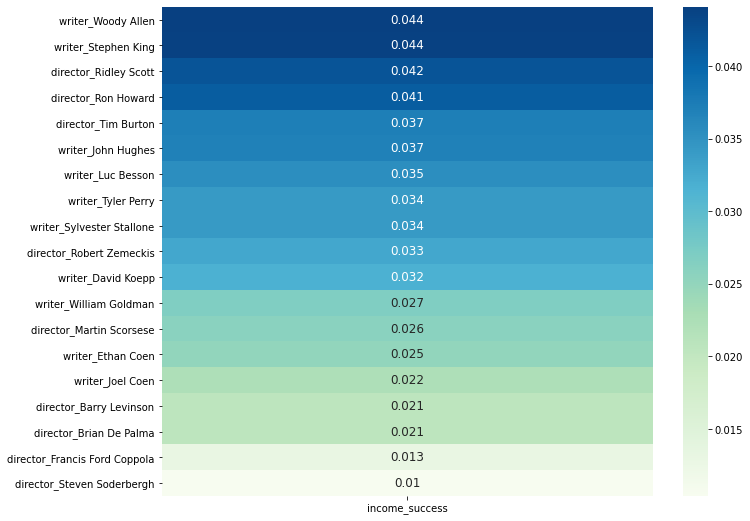

In [141]:
lwgi_actrs = pd.concat([X, y], axis=1)[['director_Woody Allen', 'director_Clint Eastwood',
       'director_Steven Spielberg', 'director_Steven Soderbergh',
       'director_Martin Scorsese', 'director_Ridley Scott',
       'director_Ron Howard', 'director_Brian De Palma',
       'director_Barry Levinson', 'director_Francis Ford Coppola',
       'director_Robert Zemeckis', 'director_Tim Burton', 
       'writer_Woody Allen', 'writer_Stephen King', 'writer_Luc Besson',
       'writer_John Hughes', 'writer_William Shakespeare',
       'writer_David Koepp', 'writer_Tyler Perry', 'writer_Ethan Coen',
       'writer_William Goldman', 'writer_John Sayles', 'writer_Joel Coen',
       'writer_Sylvester Stallone',"income_success" ]]

vscores = lwgi_actrs.corr()['income_success'].to_frame()
vscores = vscores.sort_values(by='income_success', ascending=False)

#set fig size
fig, ax = plt.subplots(figsize=(11, 9))
#plot matrix
sns.heatmap(vscores.iloc[4:23, :], annot=True, annot_kws={'size': 12}, cmap="GnBu")
plt.show()

## Answer 8 : next two cells shows that best production companies according to their correlation to income and popularity, are Universal Pictures and Warner Bros.

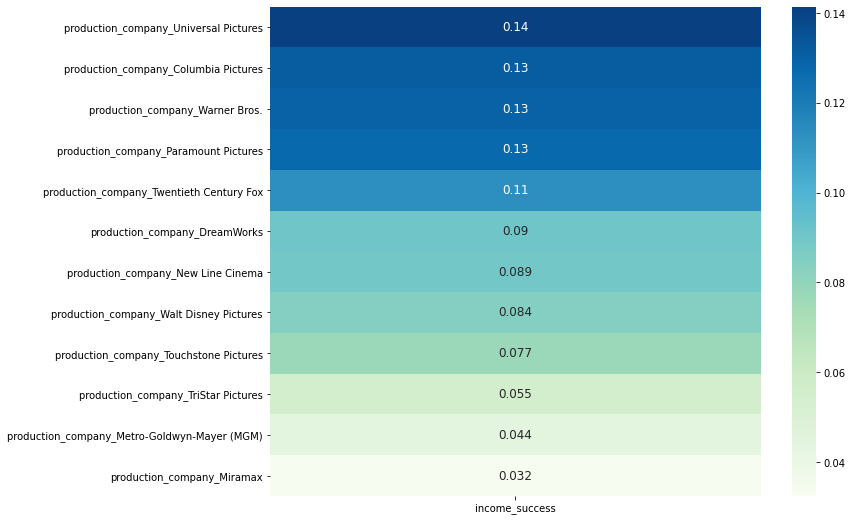

In [142]:
lwgi_actrs = pd.concat([X, y], axis=1)[['production_company_Universal Pictures',
       'production_company_Warner Bros.',
       'production_company_Columbia Pictures',
       'production_company_Paramount Pictures',
       'production_company_Twentieth Century Fox',
       'production_company_New Line Cinema',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
       'production_company_Touchstone Pictures',
       'production_company_Walt Disney Pictures',
       'production_company_DreamWorks', 'production_company_Miramax',
       'production_company_TriStar Pictures','income_success']]

vscores = lwgi_actrs.corr()['income_success'].to_frame()
vscores = vscores.sort_values(by='income_success', ascending=False)

#set fig size
fig, ax = plt.subplots(figsize=(11, 9))
#plot matrix
sns.heatmap(vscores.iloc[1:, :], annot=True, annot_kws={'size': 12}, cmap="GnBu")
plt.show()

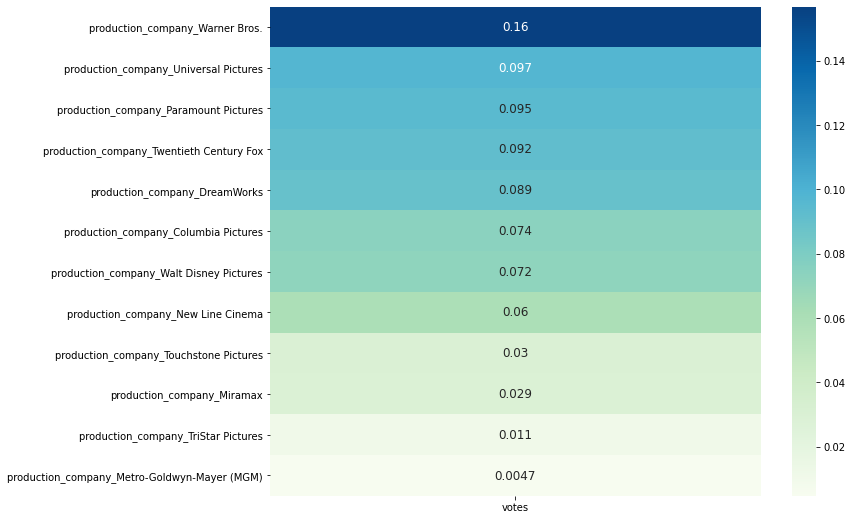

In [143]:
lwgi_actrs = pd.concat([X, y, df1.votes], axis=1)[['production_company_Universal Pictures',
       'production_company_Warner Bros.',
       'production_company_Columbia Pictures',
       'production_company_Paramount Pictures',
       'production_company_Twentieth Century Fox',
       'production_company_New Line Cinema',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
       'production_company_Touchstone Pictures',
       'production_company_Walt Disney Pictures',
       'production_company_DreamWorks', 'production_company_Miramax',
       'production_company_TriStar Pictures','votes']]

vscores = lwgi_actrs.corr()['votes']
#vscores = vscores.sort_values(by='votes', ascending=False)

#set fig size
fig, ax = plt.subplots(figsize=(11, 9))
#plot matrix
sns.heatmap(vscores.iloc[:-2, :1].sort_values(by='votes', ascending=False), annot=True, annot_kws={'size': 12}, cmap="GnBu")
plt.show()